# Worksheet

+ Feel free to work in groups of 2-3. However, you have to submit your own work.
+ I have given codes to help you plot but you have to fill in the rest to make the plots work.
+ This is due 3/20/2020 before lecture. Submit it as problemset/lastname_firstname_worksheet1.ipynb (all lowercase).

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## 1. Population migration (4 points)
Inspired by G. Strang and Game of Thrones. 

Suppose there is an epidemic in which every month half of those who are Night's watchmen become Free Folk, and a quarter of those who are 
Free Folk become White Walkers. Let their populations at month $k$ be denoted by $n_k$, $f_k$ and $w_k$. The recurrence can be expressed  as
$$ \qquad \qquad \left \lgroup 
\matrix{w_{k+1} \cr f_{k+1} \cr n_{k+1} }  
\right\rgroup= \left \lgroup \matrix{ 1 & 1/4 & 0 \cr 0 & 3/4& 1/2 \cr 0 & 0 &  1/2 }\right\rgroup \left \lgroup \matrix{w_{k} \\ f_{k} \\ n_{k}}\right\rgroup . $$
For short, we write $y_{k+1} = Ay_k$.

Suppose, initially, there are a thousand each of Night's watchmen, Free Folk and White Walkers, what happens to their population as $k\rightarrow \infty$?

1. Compute and plot the populations as a function of $k$ using the recurrence relation $y_{k+1} = Ay_k$ with initial condition $y_0$.

Text(0, 0.5, 'Population')

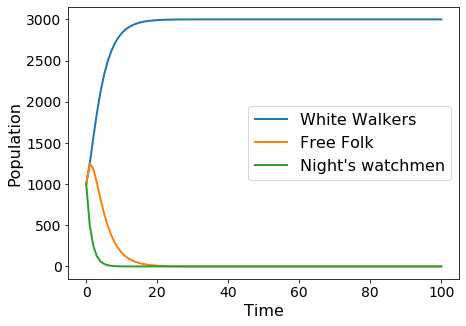

In [6]:
# The solution should be of the form 3 x 101.  
# 3 = number of species, 101 = number of time points (including initial condition)

y1 = np.zeros((3,101), dtype = 'd') 

from scipy.linalg import fractional_matrix_power as fmp
A = np.array([[1,1/4,0],[0,3/4,1/2],[0,0,1/2]])
y0=np.array([[1000],[1000],[1000]])

for i in range(101):
    y1[:,i]= (fmp(A,i)@y0).T

plt.plot(np.arange(101), y1.T, lw = 2.)
plt.legend(("White Walkers", 'Free Folk', "Night's watchmen"), fontsize = 16)
plt.xlabel('Time', fontsize = 16); plt.ylabel('Population', fontsize = 16)


2. Compute and plot the populations as a function of $k$ using the recurrence relation using the eigendecomposition. The analytical solution is $ y_k = A^k y_0$. Let $A = VDV^{-1}$ be the eigendecomposition of $A$; $A^k = VD^kV^{-1}$ and $$y_k = VD^kV^{-1}y_0.$$ 


Text(0, 0.5, 'Population')

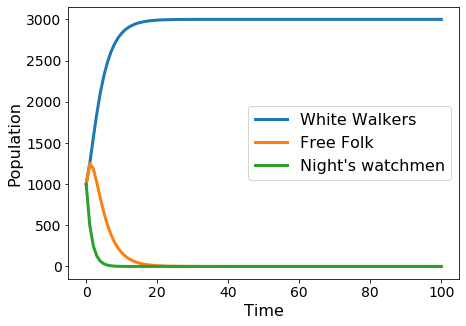

In [8]:
# Same instructions as before
y2 = np.zeros((3,101), dtype = 'd') 

from numpy import linalg as la
D0,V = la.eig(A)
D = np.diag(D0)
V1 = la.inv(V)
for i in range(101):
    y2[:,i]= (V@fmp(D,i)@V1@y0).T

plt.figure()
plt.plot(np.arange(101),y2.T, linewidth = 3.0)
plt.legend(("White Walkers", 'Free Folk', "Night's watchmen"), fontsize = 16)
plt.xlabel('Time', fontsize = 16); plt.ylabel('Population', fontsize = 16)

## 2. Fit a polynomial to experimental data (6 points)

Modified from Langtangen's book.

Suppose we have measured the oscillation period $T$ of a simple pendulum with a mass $m$ at the end of a massless rod of length $L$. We have varied $L$ and recorded the corresponding $T$ value. The measurements are found in a [file](https://github.com/hplgit/scipro-primer/blob/master/src/plot/pendulum.dat). The first column in the file contains $L$ values and the second column has the corresponding $T$ values. 

### Task 1: 
Download the file and save it as `pendulum.dat` (do not copy the values onto an array). Open the file using `numpy.loadtxt` and plot the data. (The `skiprows` feature may be useful). 

Text(0.5, 1.0, 'Data')

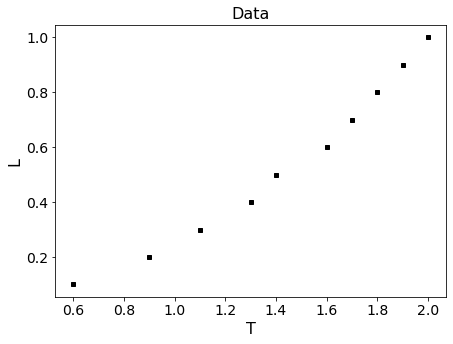

In [17]:
# Vector L should contain the lengths 
# Vector T should contain the time instances.

D=np.loadtxt('pendulum.dat',skiprows=1)
L=D[:,0]
T=D[:,1]

plt.plot(T, L, 'ks', markersize = 4)
plt.xlabel('T', fontsize = 16)
plt.ylabel('L', fontsize = 16)
plt.title('Data', fontsize = 16)

### Task 2: Fitting a line

Assume that we can write the length as a linear function
$$ L \approx x_1 + T x_2, $$
where $x_2$ is the slope and $x_1$ is the intercept. To find these coefficients, we solve the least squares problem 

$$ \min_x \| Ax - b\|^2_2  $$
where $n$ is the number of data points and 
$$ x = \begin{bmatrix} x_1 \\ x_2  \end{bmatrix} \qquad A = \begin{bmatrix} 1 & T_1 \\ 1 & T_2 \\ \vdots & \vdots \\ 1 & T_n   \end{bmatrix}  \qquad b = \begin{bmatrix} L_1 \\ L_2 \\  \vdots L_n  \end{bmatrix}.$$

Setup the matrices and solve the least squares problem using the function `numpy.linalg.lstsq` for the coefficients. Use `rcond=None` to turn off warnings (if any).  

Text(0.5, 1.0, 'Linear Fit')

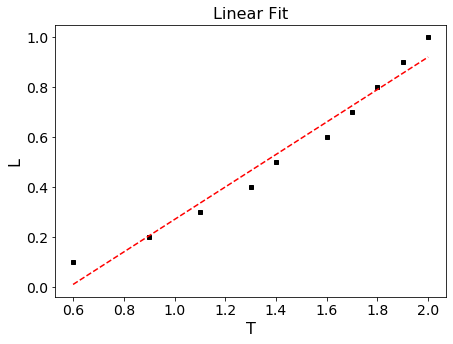

In [21]:
# Compute the coefficients in the form of the 2 x 1 vector x
# This code plots the best fits.
A = np.ones((2,10))
A[1,:]=T
A=A.T
b=L.T
x=la.lstsq(A,b,rcond=None)[0]

Tf = np.linspace(0.6,2.0)
Lf = x[0] + Tf*x[1]

plt.plot(T, L, 'ks', Tf, Lf, 'r--',  markersize = 4)
plt.xlabel('T', fontsize = 16)
plt.ylabel('L', fontsize = 16)
plt.title('Linear Fit', fontsize = 16)

### Bonus part:

Implement your own least squares solver using QR factorization/ Singular Value Decomposition.

### Task 3: Fitting polynomials



We shall assume that L as a function of T is a polynomial. Use the NumPy
utilities `numpy.polyfit` and `numpy.poly1d` to fit polynomials of degree 2 and 3 to the $L$ and $T$ data. Plot the polynomial curves together with the experimental data. Which polynomial fits the measured data best?


Text(0.5, 1.0, 'Polynomial Fit')

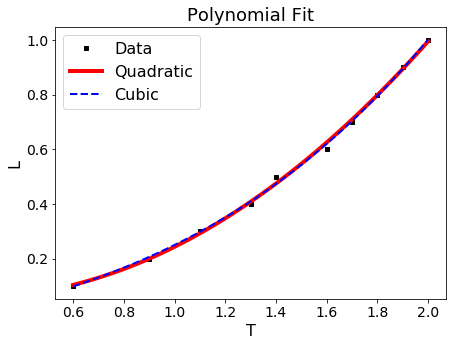

In [14]:
# Tf is the time instances from before to plot the fits
# Create two vectors L2f and L3f which evaluate the best fits of degree 2 and 3 respectively at 
# the time instance Tf.

t1 = np.poly1d(np.polyfit(T,L,2))
t2 = np.poly1d(np.polyfit(T,L,3))
L2f=t1(Tf)
L3f=t2(Tf)

plt.plot(T, L, 'ks', Tf, L2f,'r-', lw = 4., markersize = 4) 
plt.plot(Tf, L3f, 'b--',  lw = 2.)
plt.xlabel('T', fontsize = 16)
plt.ylabel('L', fontsize = 16)
plt.legend(('Data', 'Quadratic', 'Cubic'), fontsize = 16)
plt.title('Polynomial Fit', fontsize = 18)